# Convert OOI Parsed JSON to NetCDF file
using CF-1.6, Discrete Sampling Geometry (DSG) conventions, **`featureType=timeSeries`**

In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np

from pyaxiom.netcdf.sensors import TimeSeries

In [2]:
infile = './20170130.superv.json'
outfile = './20170130.superv.nc'
with open(infile) as jf:
    js = json.load(jf)
    df = pd.DataFrame({})
    for k, v in js.items():
        df[k] = v
    df['time'] = pd.to_datetime(df.time, unit='s')
    df['depth'] = 0.
df.head()

,leak_detect_voltage2,dsl_power_state,ground_fault_9522_fw,heartbeat_delta,temperature1,fwwf_power_flag,iridium_current,iridium_error_flag,fwwf_power_state,ground_fault_enable,...,backup_battery_current,heartbeat_threshold,heartbeat_enable,sbd_message_pending,leak_detect_enable,wake_time_count,ground_fault_gps,temperature2,main_voltage,depth
0,1240,1,-13.7,125,15.5,0,0.0,0,0,15,...,0.0,2,1,0.0,3,0.0,-15.3,13.6,22.9,0.0
1,1238,1,-13.7,125,15.8,0,0.0,0,0,15,...,0.0,2,1,0.0,3,0.0,-15.3,13.6,20.6,0.0
2,1240,1,-13.7,125,16.2,0,0.0,0,0,15,...,0.0,2,1,0.0,3,0.0,-15.3,14.3,20.9,0.0
3,1226,1,-13.7,125,16.7,0,0.0,0,0,15,...,0.0,2,1,0.0,3,0.0,-15.3,14.4,21.0,0.0
4,1221,1,402.4,125,17.1,0,0.0,0,3,15,...,0.0,2,1,0.0,3,0.0,-88.3,15.0,17.8,0.0


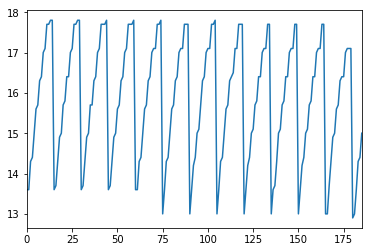

In [3]:
df['temperature2'].plot();

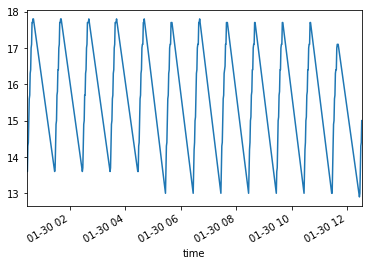

In [4]:
df.index = df['time']
df['temperature2'].plot();

### Define the NetCDF global attributes

In [5]:
global_attributes = {
    'institution':'Oregon State University', 
    'title':'OOI CE01ISSM Supervisor Data',
    'summary':'OOI Supervisor data from Coastal Endurance Inshore Surface Mooring',
    'creator_name':'Chris Wingard',
    'creator_email':'cwingard@coas.oregonstate.edu',
    'creator_url':'http://ceoas.oregonstate.edu/ooi'
}

### Create initial file

In [6]:
ts = TimeSeries(
    output_directory='.',
    latitude=44.65833,
    longitude=-124.0953,
    station_name='ce01issm',
    global_attributes=global_attributes,
    times=df.time.values.astype(np.int64) // 10**9,
    verticals=df.depth.values,
    output_filename=outfile,
    vertical_positive='down'
)

### Add data variables

In [7]:
for c in df.columns:
    if c in ts._nc.variables:
        print("Skipping '{}' (already in file)".format(c))
        continue
    if c in ['time', 'lat', 'lon', 'depth', 'cpm_date_time_string']:
        print("Skipping axis '{}' (already in file)".format(c))
        continue
    ts.add_variable(c, df[c].values)
    print("Added {}".format(c))
        

Added leak_detect_voltage2
Added dsl_power_state
Added ground_fault_9522_fw
Added heartbeat_delta
Added temperature1
Added fwwf_power_flag
Added iridium_current
Added iridium_error_flag
Added fwwf_power_state
Added ground_fault_enable
Added pressure
Added iridium_voltage
Added leak_detect_voltage1
Added ground_fault_main
Added pps_source
Skipping 'time' (already in file)
Added fwwf_voltage
Added esw_power_state
Added error_flags
Added wake_code
Added humidity
Added sbd_power_state
Added fwwf_current
Skipping axis 'cpm_date_time_string' (already in file)
Added iridium_power_state
Added main_current
Added wake_power_count
Added dcl_power_state
Added gps_power_state
Added ground_fault_sbd
Added backup_battery_voltage
Added backup_battery_current
Added heartbeat_threshold
Added heartbeat_enable
Added sbd_message_pending
Added leak_detect_enable
Added wake_time_count
Added ground_fault_gps
Added temperature2
Added main_voltage
Skipping axis 'depth' (already in file)


In [8]:
### Open the NetCDF file and inspect it

In [9]:
import netCDF4
nc = netCDF4.Dataset(outfile)

In [10]:
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    creator_url: http://ceoas.oregonstate.edu/ooi
    summary: OOI Supervisor data from Coastal Endurance Inshore Surface Mooring
    creator_name: Chris Wingard
    institution: Oregon State University
    title: OOI CE01ISSM Supervisor Data
    creator_email: cwingard@coas.oregonstate.edu
    Conventions: CF-1.6,ACDD-1.3
    date_created: 2017-01-31T14:36:00Z
    date_modified: 2017-01-31T14:36:00Z
    date_issued: 2017-01-31T14:36:00Z
    date_metadata_modified: 2017-01-31T14:36:00Z
    cdm_data_type: Station
    history: 2017-01-31T14:36:00Z - pyaxiom - File created using pyaxiom
    geospatial_lat_min: 44.65833
    geospatial_lat_max: 44.65833
    geospatial_lat_resolution: 0
    geospatial_lat_units: degrees_north
    geospatial_lon_min: -124.0953
    geospatial_lon_max: -124.0953
    geospatial_lon_resolution: 0
    geospatial_lon_units: degrees_east
    geospatial_bounds: POINT(-124.0953 44.65

In [11]:
nc.close()